<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/skhabiri_LS_DS_214_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [158]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://github.com/skhabiri/PredictiveModeling-LinearModels-u2s1/tree/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [159]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [160]:
print(df.shape)
df.head()

(423, 66)


,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
# check number of classes in target
df["overall"].value_counts(dropna=False)

4.00000    74
3.50000    46
3.00000    39
4.50000    24
4.20000    24
2.00000    19
3.90000    17
3.70000    15
3.80000    15
4.10000    12
5.00000    11
3.20000    11
2.50000     9
3.60000     9
4.25000     8
4.80000     7
4.30000     7
3.10000     6
3.75000     6
2.60000     6
2.80000     5
4.60000     4
4.70000     4
2.70000     4
2.90000     4
3.30000     4
2.20000     4
4.40000     4
1.50000     4
3.40000     3
4.90000     3
NaN         2
3.25000     2
1.80000     2
2.40000     2
2.75000     2
2.30000     2
2.66000     1
1.00000     1
3.33333     1
Name: overall, dtype: int64

In [162]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
"""
subset : array-like, optional
    Labels along other axis to consider
how: 'any' : If any NA values are present, drop that row or column.
     'all' : If all values are NA, drop that row or column.
"""
df = df.dropna(axis=0, how='any', subset=['overall'], inplace=False)

# df['overall'] >= 4 is a pd.Series with boolean values
df['Great'] = df['overall'] >= 4

In [163]:
# two rows with missing values are dropped, and 'Great' colun is added
df.shape

(421, 67)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 422
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        421 non-null    object 
 1   Burrito         421 non-null    object 
 2   Date            421 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     float64
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            414 non-null    float64
 10  Hunger          418 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          283 non-null    float64
 14  Circum          281 non-null    float64
 15  Volume          281 non-null    float64
 16  Tortilla        421 non-null    float64
 17  Temp            401 non-null    flo

**Data Wrangling**

Let's perform some data wrangling to clean up redundant labels with different spelling

In [165]:
df["Burrito"].value_counts()

California              101
Carne asada              29
California               26
Carnitas                 23
Surf & Turf              14
                       ... 
Shredded beef             1
Dave's California         1
Especial                  1
California breakfast      1
Spicy a la Diabla         1
Name: Burrito, Length: 132, dtype: int64

In [166]:
# Clean/combine the Burrito categories

# converting the labeling to lower case
df['Burrito'] = df['Burrito'].str.lower()

#processing white spaces and consolidating the labels to fewer categories
# california variable is a boolean pd.Series
california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

# boolean indexing for .loc rows
df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [167]:
california.head()

0     True
1     True
2    False
3    False
4     True
Name: Burrito, dtype: bool

**Number of "Burrito" categories are reduced to 5**

In [168]:
df["Burrito"].value_counts()

California     169
Other          156
Asada           43
Surf & Turf     28
Carnitas        25
Name: Burrito, dtype: int64

**Drop high cardinality columns**

In [169]:
# Drop some high cardinality categoricals
df = df.drop(labels=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'], axis=1)
# Alternative
# df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

** Columns which causes leakage **

In [170]:
# Drop some columns to prevent "leakage"
# Recommended and overal are derivatives of target column 'Great', causing leakage
df = df.drop(columns=['Rec', 'overall'])

In [171]:
df.shape

(421, 59)

* Convert "Date" column into datetime format

In [172]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [173]:
df["Date"].value_counts()

2016-08-30    29
2016-06-24     9
2019-08-27     9
2016-05-13     7
2016-04-15     7
              ..
2016-09-13     1
2016-11-14     1
2016-12-15     1
2016-10-07     1
2019-08-24     1
Name: Date, Length: 169, dtype: int64

* Data Wrangling (keeping numerical and desired categorical columns and dropping NaN columns

In [174]:
df.isna().sum(axis=0) > 100

Burrito           False
Date              False
Yelp               True
Google             True
Chips              True
Cost              False
Hunger            False
Mass (g)           True
Density (g/mL)     True
Length             True
Circum             True
Volume             True
Tortilla          False
Temp              False
Meat              False
Fillings          False
Meat:filling      False
Uniformity        False
Salsa             False
Synergy           False
Wrap              False
Unreliable         True
NonSD              True
Beef               True
Pico               True
Guac               True
Cheese             True
Fries              True
Sour cream         True
Pork               True
Chicken            True
Shrimp             True
Fish               True
Rice               True
Beans              True
Lettuce            True
Tomato             True
Bell peper         True
Carrots            True
Cabbage            True
Sauce              True
Salsa.1         

In [175]:
df.columns[df.isna().sum(axis=0)>415]

Index(['Carrots', 'Taquito', 'Ham', 'Chile relleno', 'Nopales', 'Lobster',
       'Queso', 'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Corn', 'Zucchini'],
      dtype='object')

In [176]:
def wrangle(df, thd, cat_list, y_list):
    """
    thd: threshold level for nan data in a column to drop the column. float between [0,1]
    cat_list: list of categorical features to include in the input matrics
    list of target label(s)
    """
    #identify numeric columns
    num_cols = df.select_dtypes(include='number').columns

    #Append one hot encoder categorical columns to the dataframe
    df1 = df[cat_list + list(num_cols) + y_list]

    #identify columns with thd ratio of NaNs

    # argument of df1.columns is a boolean indexing for column labels
    # return value of df1.columns[] is a pd.Index of the columns
    df1 = df1.drop(df1.columns[df1.isna().sum(axis=0) >= thd*len(df1)], axis=1)
    
    return df1

In [177]:
df1 =wrangle(df, 0.7, ["Burrito"], ["Great"])
df1.shape

(421, 16)

* Convert categorical column into numerical columns with one hot encoder

In [178]:
# For pipeline Onehotencoder() should be imported from `category_encoders`, not `sklearn`
# from sklearn.preprocessing import OneHotEncoder
from category_encoders import OneHotEncoder 

*We can either encode the categorical features and merge the encoded dataframe with the rest of the features or let the OneHotEncoder takes care of it*

In [179]:
ohe = OneHotEncoder()
Burrito_num = ohe.fit_transform(df1["Burrito"])
print(type(Burrito_num))
print(Burrito_num[:5])
print(df1.shape, Burrito_num.shape)

<class 'pandas.core.frame.DataFrame'>
   Burrito_1  Burrito_2  Burrito_3  Burrito_4  Burrito_5
0          1          0          0          0          0
1          1          0          0          0          0
2          0          1          0          0          0
3          0          0          1          0          0
4          1          0          0          0          0
(421, 16) (421, 5)


/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [180]:
df1c = df1.copy()
df1 = pd.merge(df1, Burrito_num, left_index=True, right_index=True).drop(labels=["Burrito"], axis=1)
df1.shape

(421, 20)

*Here is the alternative way. The ohe can determine which features are categorical and only does the encoding on those.*

In [181]:
df_encoded = ohe.fit_transform(df1c)
print(type(df_encoded), df_encoded.shape)
print(ohe.feature_names)
print("*"*10)
print(ohe.get_feature_names())
print("*"*10)
ohe.get_params()

<class 'pandas.core.frame.DataFrame'> (421, 20)
['Burrito_1', 'Burrito_2', 'Burrito_3', 'Burrito_4', 'Burrito_5', 'Cost', 'Hunger', 'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Great']
**********
['Burrito_1', 'Burrito_2', 'Burrito_3', 'Burrito_4', 'Burrito_5', 'Cost', 'Hunger', 'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Great']
**********


/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'cols': ['Burrito'],
 'drop_invariant': False,
 'handle_missing': 'value',
 'handle_unknown': 'value',
 'return_df': True,
 'use_cat_names': False,
 'verbose': 0}

### Split training, validation and test data based on date

In [182]:
#Y-M-D or M-D-Y
mask_2017 = pd.to_datetime('01-01-2017')
mask_2018 = pd.to_datetime('01-01-2018')
print(pd.to_datetime('08-18-2018'))
pd.to_datetime('2018-04-14')

2018-08-18 00:00:00


Timestamp('2018-04-14 00:00:00')

In [183]:
df["Date"].describe()

/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     421
unique                    169
top       2016-08-30 00:00:00
freq                       29
first     2011-05-16 00:00:00
last      2026-04-25 00:00:00
Name: Date, dtype: object

In [184]:
# split data into three categories
train = df1[df["Date"] < mask_2017]
valid = df1[(df["Date"] >= mask_2017) & (df["Date"] < mask_2018)]
test = df1[df["Date"] >= mask_2018]

In [185]:
# Chck if the split left anything out or overlaps
assert len(df) == len(train) + len(valid) + len(test)

**X and Y label**

In [186]:
# pop removes the target from X_train and assign it to y_train
X_train = train
y_train = X_train.pop("Great")

X_valid = valid
y_valid = X_valid.pop("Great")

X_test = test
y_test = X_test.pop("Great")

**Baseline model**

Based on majority class

In [187]:
y_train.unique()

array([False,  True])

In [188]:
y_train.value_counts(normalize=True)

False    0.590604
True     0.409396
Name: Great, dtype: float64

Base line model: all the prediction is False (majority label)
and that's 59% prediction.
Now let's check the missing values.

In [189]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 300
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cost          292 non-null    float64
 1   Hunger        297 non-null    float64
 2   Length        175 non-null    float64
 3   Circum        174 non-null    float64
 4   Volume        174 non-null    float64
 5   Tortilla      298 non-null    float64
 6   Temp          283 non-null    float64
 7   Meat          288 non-null    float64
 8   Fillings      297 non-null    float64
 9   Meat:filling  292 non-null    float64
 10  Uniformity    296 non-null    float64
 11  Salsa         278 non-null    float64
 12  Synergy       296 non-null    float64
 13  Wrap          296 non-null    float64
 14  Burrito_1     298 non-null    int64  
 15  Burrito_2     298 non-null    int64  
 16  Burrito_3     298 non-null    int64  
 17  Burrito_4     298 non-null    int64  
 18  Burrito_5     298 non-null    

*Imputing NaN values as needed for SelectKBest and Regression models. The output of the imputer is numpy array*

In [190]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

In [191]:
# Fill na with SimpleImputer, we won't do that for y though
si = SimpleImputer(strategy='mean')
X_train_imp = si.fit_transform(X_train)
X_valid_imp = si.transform(X_valid)
X_test_imp = si.transform(X_test)

In [192]:
# Casting imputer np.array back into DataFrame
X_train_imp_df = pd.DataFrame(X_train_imp, columns = X_train.columns)
X_valid_imp_df = pd.DataFrame(X_valid_imp, columns = X_train.columns)
X_test_imp_df = pd.DataFrame(X_test_imp, columns = X_train.columns)

# CHeck if there is any missing value left
X_train_imp_df.isna().any()

Cost            False
Hunger          False
Length          False
Circum          False
Volume          False
Tortilla        False
Temp            False
Meat            False
Fillings        False
Meat:filling    False
Uniformity      False
Salsa           False
Synergy         False
Wrap            False
Burrito_1       False
Burrito_2       False
Burrito_3       False
Burrito_4       False
Burrito_5       False
dtype: bool

### Perform feature selection by SelectKBest

In [193]:
X_train_imp_df.shape

(298, 19)

In [194]:
from sklearn.feature_selection import SelectKBest
Kbest = SelectKBest(k=8)

# SelectKBest can take DataFrame or np.array as input
X_train_Kbest = Kbest.fit_transform(X_train_imp, y_train)
X_valid_Kbest = Kbest.transform(X_valid_imp)
X_test_Kbest = Kbest.transform(X_test_imp)

#Alternative way to create X_val_Kbest
print("Kbest.get_support():\n", Kbest.get_support())
print(type(Kbest.get_support()))

# Kbest.get_support() provide np.array of boolean indexing for df.columns[] Series
Kbest_cols = X_train_imp_df.columns[Kbest.get_support()]

X_valid_Kbest_alt = X_valid_imp_df[Kbest_cols]
assert (X_valid_Kbest == X_valid_Kbest_alt).all(axis=0).all()
Kbest_cols

Kbest.get_support():
 [False False False False False  True  True  True  True  True  True  True
  True False False False False False False]
<class 'numpy.ndarray'>


Index(['Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity',
       'Salsa', 'Synergy'],
      dtype='object')

In [195]:
(X_valid_Kbest == X_valid_Kbest_alt).head(2)

,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True


### Linear Regression

In [196]:
from sklearn.linear_model import LinearRegression, LogisticRegression

lin_model = LinearRegression()

In [197]:
lin_model.fit(X_train_Kbest, y_train)

LinearRegression()

In [198]:
# Apply our model to new data
y_train_pred = lin_model.predict(X_train_Kbest)
y_valid_pred = lin_model.predict(X_valid_Kbest)
y_test_pred = lin_model.predict(X_test_Kbest)
type(y_train_pred)

numpy.ndarray

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [200]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_valid = mean_absolute_error(y_valid, y_valid_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_valid = r2_score(y_valid, y_valid_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Mean Absolute Error(Train, Valid, Test):, {mae_train:.2e}, {mae_valid:.2e}, {mae_test:.2e}')
print(f'Root Mean Squared Error(Train, Valid, Test):, {rmse_train:.2e}, {rmse_valid:.2e}, {rmse_test:.2e}')
print(f'R^2(Train, Valid, Test):, {r2_train:.3f}, {r2_valid:.3f}, {r2_test:.3f}')

Mean Absolute Error(Train, Valid, Test):, 2.93e-01, 3.33e-01, 3.34e-01
Root Mean Squared Error(Train, Valid, Test):, 3.39e-01, 3.65e-01, 3.87e-01
R^2(Train, Valid, Test):, 0.525, 0.461, 0.386


*R2 score shows some overfit. Do not confuse R2 score with accuracy, as linear regression does not have an accuracy score*

Let's use sns.regplot to plot the regression line on a x,y scatter plot.

<AxesSubplot:xlabel='Fillings', ylabel='Great'>

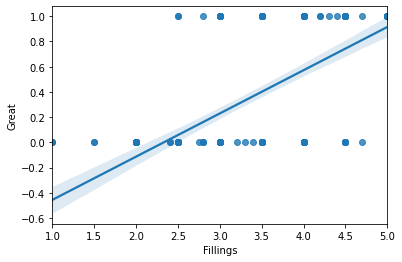

In [201]:
import seaborn as sns
sns.regplot(x=X_train['Fillings'], y=y_train)

### Logistic Regression

In [202]:
log_model = LogisticRegression()

In [203]:
log_model.fit(X_train_Kbest, y_train)
y_test_pred = log_model.predict(X_test_Kbest)

# .score() method on trained model (log_model) yields accuracy score
print('Training Accuracy:', log_model.score(X_train_Kbest, y_train))
print('Validation Accuracy:', log_model.score(X_valid_Kbest, y_valid))
print('Test Accuracy:', log_model.score(X_test_Kbest, y_test))

y_test_pred[:10]

Training Accuracy: 0.8859060402684564
Validation Accuracy: 0.8470588235294118
Test Accuracy: 0.7894736842105263


array([ True,  True, False,  True, False, False,  True,  True,  True,
        True])

~79% accuracy on unseen (test) data. Not bad!

## Put everything into a pipeline

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Split the wrangled data fresh before encodeing, or imputing, or SelectKBest feature selection 

In [205]:
df1 =wrangle(df, 0.7, ["Burrito"], ["Great"])
train = df1[df["Date"] < mask_2017]
valid = df1[(df["Date"] >= mask_2017) & (df["Date"] < mask_2018)]
test = df1[df["Date"] >= mask_2018]

In [206]:
X_train = train
y_train = X_train.pop("Great")

X_valid = valid
y_valid = X_valid.pop("Great")

X_test = test
y_test = X_test.pop("Great")

In [207]:
X_train.nunique()

Burrito          5
Cost            80
Hunger          22
Length          25
Circum          26
Volume          54
Tortilla        16
Temp            17
Meat            20
Fillings        19
Meat:filling    23
Uniformity      18
Salsa           21
Synergy         23
Wrap            16
dtype: int64

In [208]:
X_train.describe(exclude='number')

,Burrito
count,298
unique,5
top,California
freq,118


*pipeline argument is a list of tuples, with first element the name string of the step and second the step object instance. Most of sklearn API methods work for pipeline aswell*

In [209]:
# Instantiate pipeline with steps
# 
logR_pipe = Pipeline([
                      ('ohe', OneHotEncoder(cols=["Burrito"])),  # Only encode the cols
                      ('imputer', SimpleImputer()),
                      ('selector', SelectKBest(k=8)),
                      ('logR', LogisticRegression())

])

**Notice no fit_tranform for train set nor tranform() for validation/test sets in a pipeline**

In [210]:
# Fit model on training data
logR_pipe.fit(X_train, y_train)

/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('ohe', OneHotEncoder(cols=['Burrito'])),
                ('imputer', SimpleImputer()), ('selector', SelectKBest(k=8)),
                ('logR', LogisticRegression())])

In [211]:
#metric (accuracy) on test set
print('Training Accuracy:', logR_pipe.score(X_train, y_train))
print('Validation Accuracy:', logR_pipe.score(X_valid, y_valid))
print('Test Accuracy:', logR_pipe.score(X_test, y_test))

Training Accuracy: 0.8859060402684564
Validation Accuracy: 0.8470588235294118
Test Accuracy: 0.7894736842105263


In [212]:
y_test_pred = logR_pipe.predict(X_test)
print(y_test_pred[:10])

#alternative way to get the accuracy score without access to trained model
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=y_test_pred, normalize=True) 

[ True  True False  True False False  True  True  True  True]


0.7894736842105263

In [213]:
logR_pipe.predict_proba(X_test)[:10]

array([[3.34542514e-04, 9.99665457e-01],
       [6.23125467e-03, 9.93768745e-01],
       [9.95203158e-01, 4.79684183e-03],
       [7.97847500e-05, 9.99920215e-01],
       [9.97128434e-01, 2.87156643e-03],
       [8.21223660e-01, 1.78776340e-01],
       [6.35509649e-02, 9.36449035e-01],
       [1.17086851e-03, 9.98829131e-01],
       [3.67367604e-01, 6.32632396e-01],
       [1.89681571e-01, 8.10318429e-01]])